#### Lab3 - Zuzanna Olszówka

# Rozwiązanie

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Zadanie 1

In [2]:
data1 <- read.csv("timetests.csv")
print(data1)

    Length Scalar    Matrix
1       10  1e-07 0.0000002
2       10  1e-07 0.0000003
3       10  1e-07 0.0000002
4       10  0e+00 0.0000002
5       10  0e+00 0.0000002
6       10  1e-07 0.0000002
7       10  0e+00 0.0000002
8       10  0e+00 0.0000002
9       10  1e-07 0.0000003
10      10  0e+00 0.0000002
11      35  1e-07 0.0000008
12      35  1e-07 0.0000008
13      35  1e-07 0.0000008
14      35  0e+00 0.0000007
15      35  1e-07 0.0000007
16      35  1e-07 0.0000023
17      35  0e+00 0.0000007
18      35  1e-07 0.0000007
19      35  0e+00 0.0000007
20      35  1e-07 0.0000007
21      60  1e-07 0.0000020
22      60  1e-07 0.0000039
23      60  1e-07 0.0000019
24      60  0e+00 0.0000019
25      60  1e-07 0.0000019
26      60  1e-07 0.0000019
27      60  0e+00 0.0000019
28      60  1e-07 0.0000019
29      60  1e-07 0.0000019
30      60  1e-07 0.0000020
31      85  1e-07 0.0000052
32      85  1e-07 0.0000036
33      85  1e-07 0.0000036
34      85  1e-07 0.0000088
35      85  1e-07 0.

In [3]:
results <- aggregate(cbind(Scalar, Matrix) ~ Length, data=data1, FUN=mean)
results$Scalar_sd <- aggregate(Scalar ~ Length, data=data1, FUN=sd)$Scalar
results$Matrix_sd <- aggregate(Matrix ~ Length, data=data1, FUN=sd)$Matrix
colnames(results) <- c('Length', 'Scalar_mean', 'Matrix_mean', 'Scalar_sd', 'Matrix_sd')
print(results)

   Length Scalar_mean Matrix_mean    Scalar_sd    Matrix_sd
1      10     5.0e-08  0.00000022 5.270463e-08 4.216370e-08
2      35     7.0e-08  0.00000089 4.830459e-08 4.976612e-07
3      60     8.0e-08  0.00000212 4.216370e-08 6.268085e-07
4      85     9.0e-08  0.00000429 3.162278e-08 1.662963e-06
5     110     1.0e-07  0.00000928 0.000000e+00 1.658513e-06
6     135     1.0e-07  0.00002017 0.000000e+00 1.587248e-05
7     160     1.1e-07  0.00001246 3.162278e-08 4.060651e-07
8     185     1.2e-07  0.00001918 4.216370e-08 2.353154e-06
9     210     1.4e-07  0.00002371 5.163978e-08 2.089365e-06
10    235     1.7e-07  0.00003002 4.830459e-08 2.847143e-06
11    260     1.6e-07  0.00003451 5.163978e-08 2.217832e-06
12    285     2.0e-07  0.00004458 0.000000e+00 2.484530e-06
13    310     2.3e-07  0.00005372 4.830459e-08 3.488330e-06
14    335     2.4e-07  0.00007963 5.163978e-08 1.900947e-05
15    360     2.4e-07  0.00006596 5.163978e-08 1.995105e-06
16    385     3.0e-07  0.00007954 0.0000

## Zadanie 2

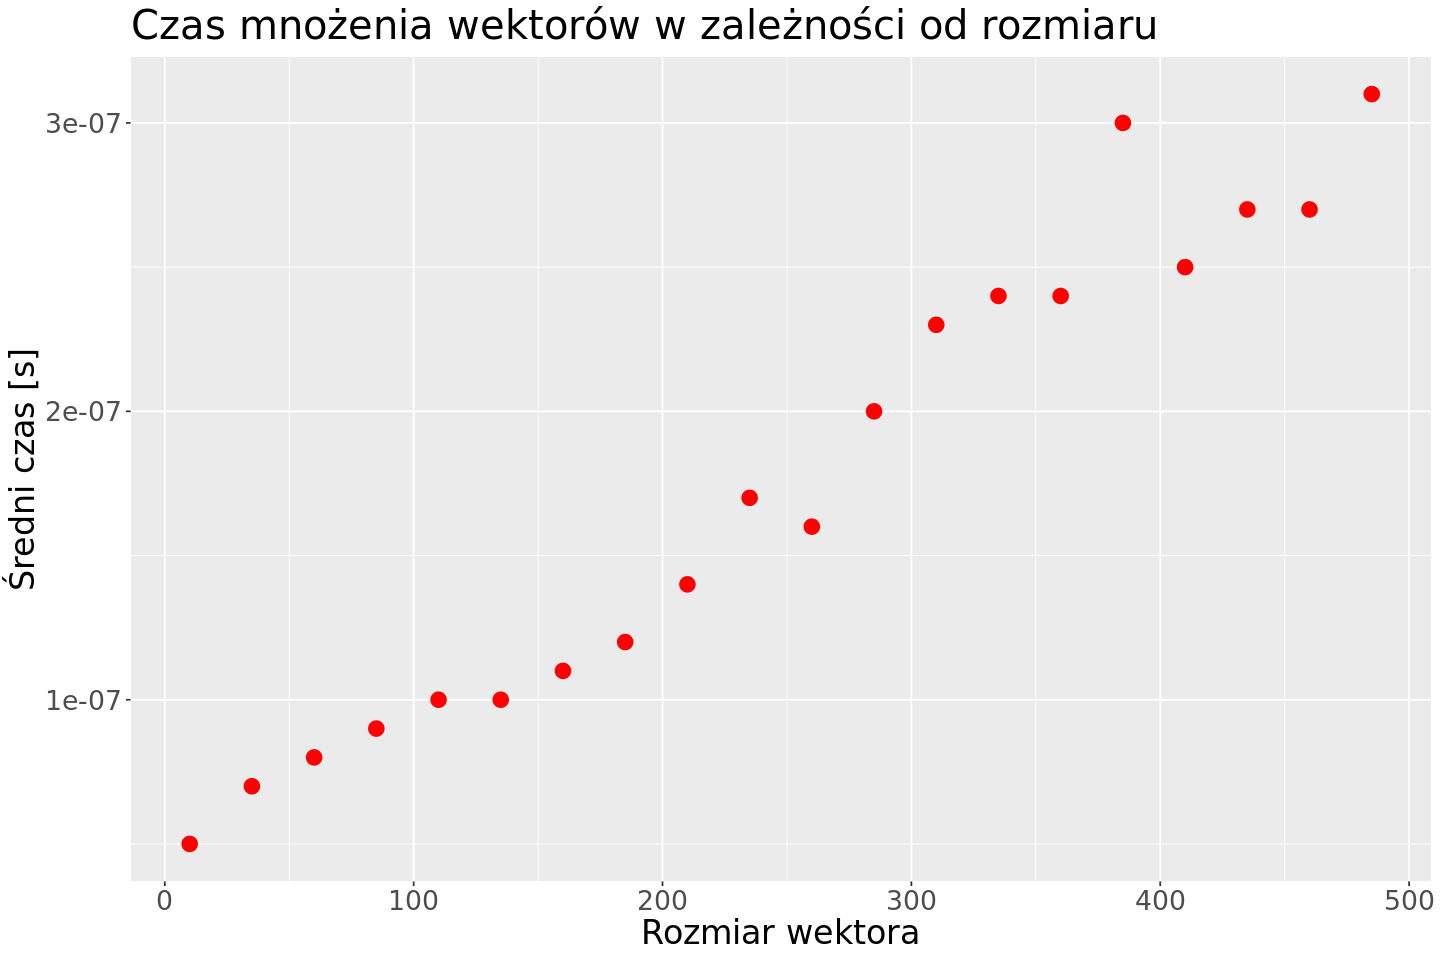

In [4]:
options(repr.plot.width=12, repr.plot.height=8)
wyk1 <- ggplot(results, aes(x = Length)) + 
geom_point(aes(y = Scalar_mean), size = 4, color="red") +
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk1

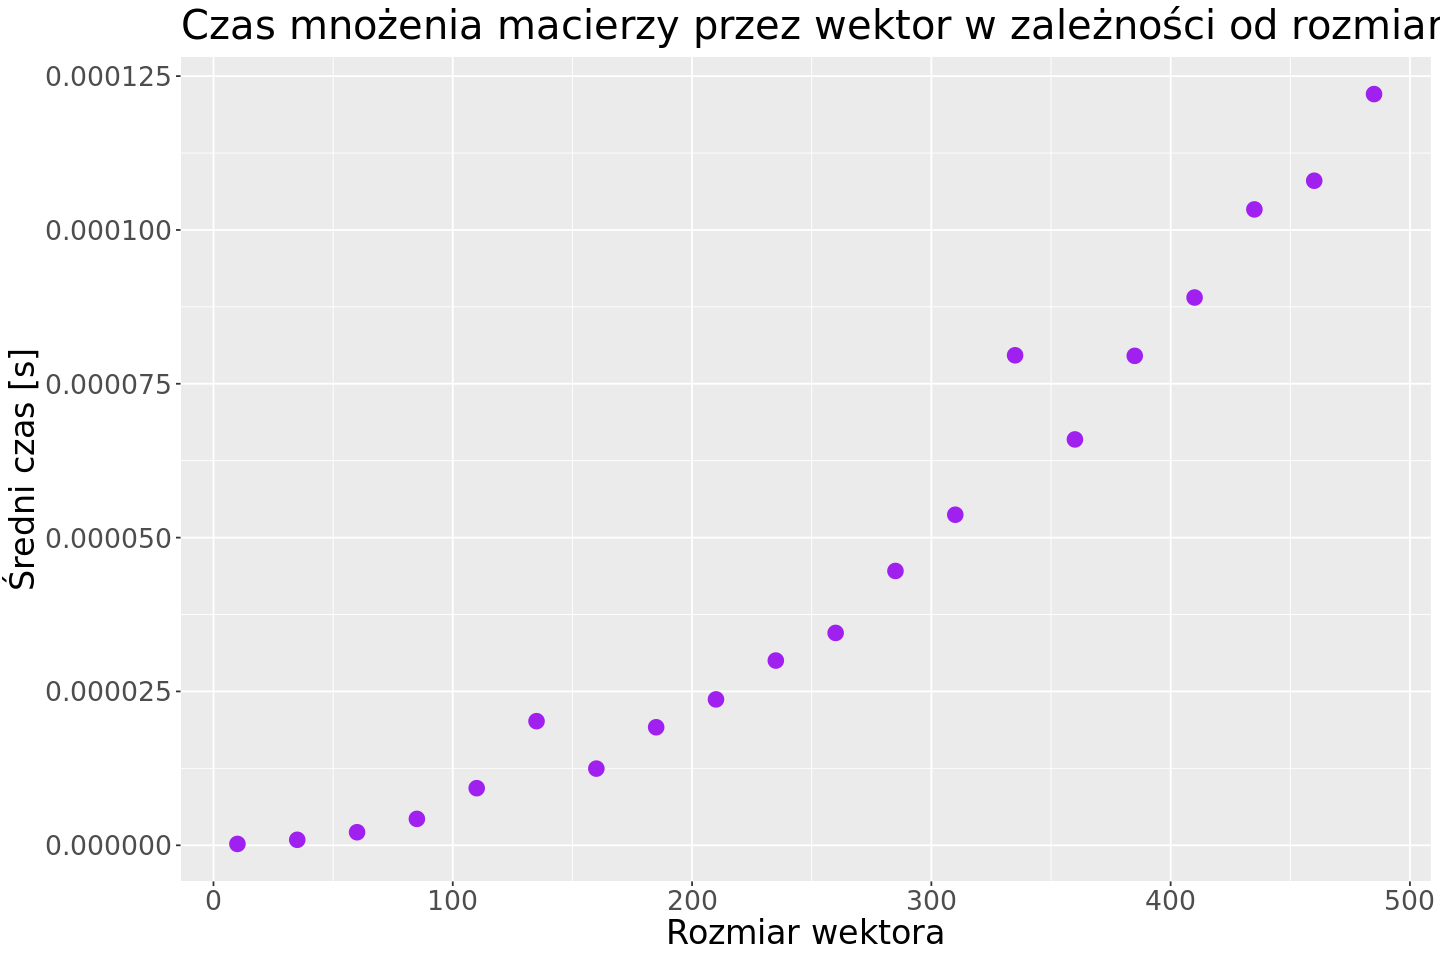

In [5]:
wyk2 <- ggplot(results, aes(x = Length)) + 
geom_point(aes(y = Matrix_mean), size = 4, color="purple") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy przez wektor w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk2

## Zadanie 3

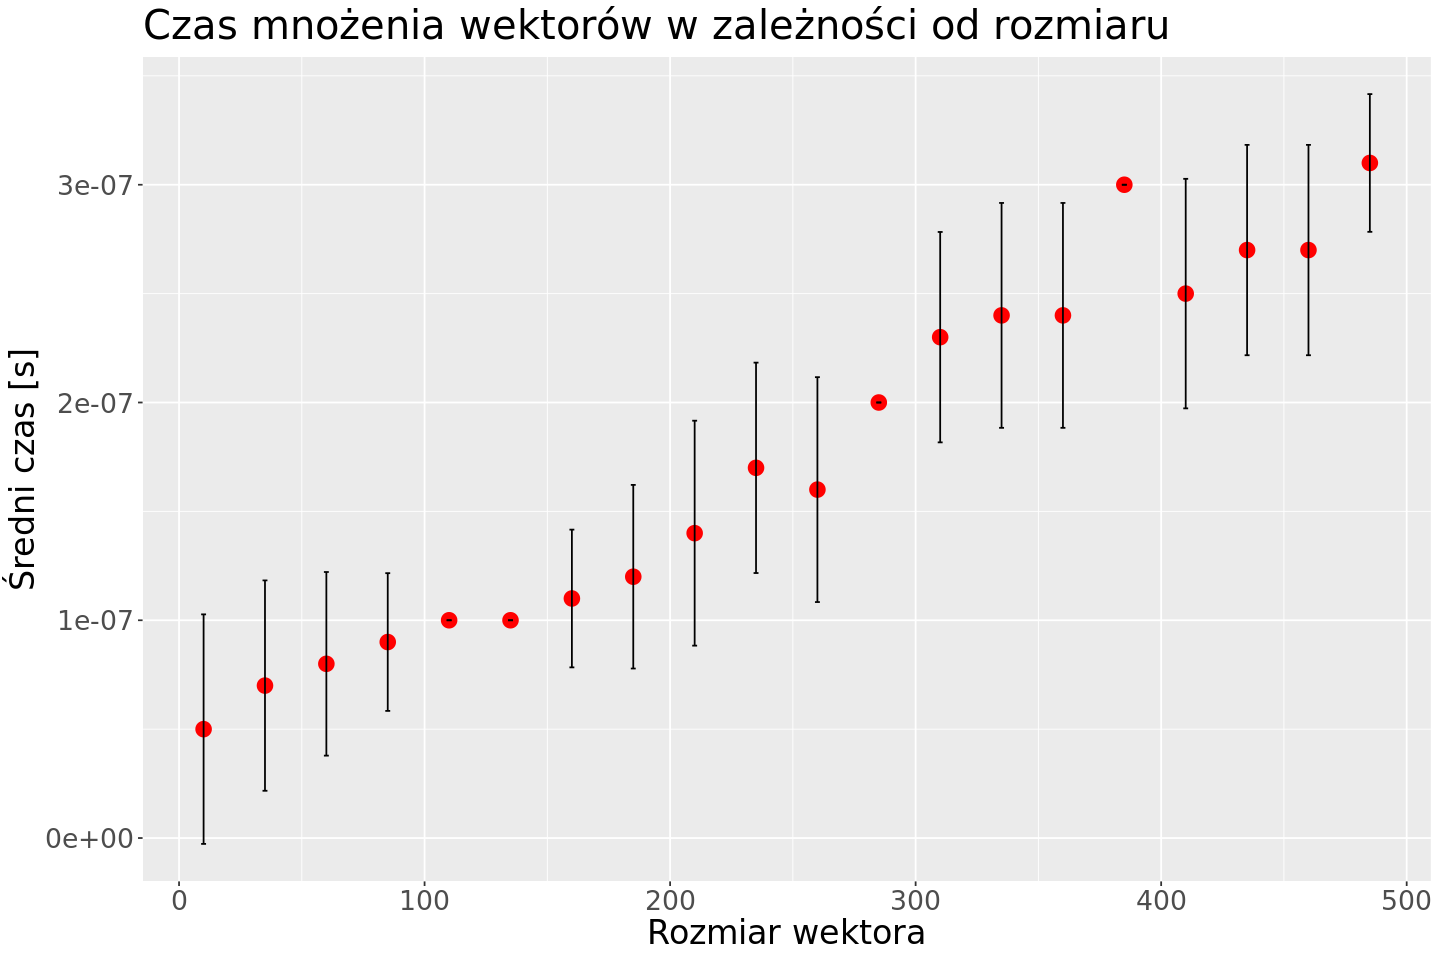

In [6]:
wyk3 <- ggplot(results, aes(x = Length)) + 
geom_point(aes(y = Scalar_mean), size = 4, color="red") +
geom_errorbar(aes(ymin = Scalar_mean - Scalar_sd, ymax = Scalar_mean + Scalar_sd, width=2)) +
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk3

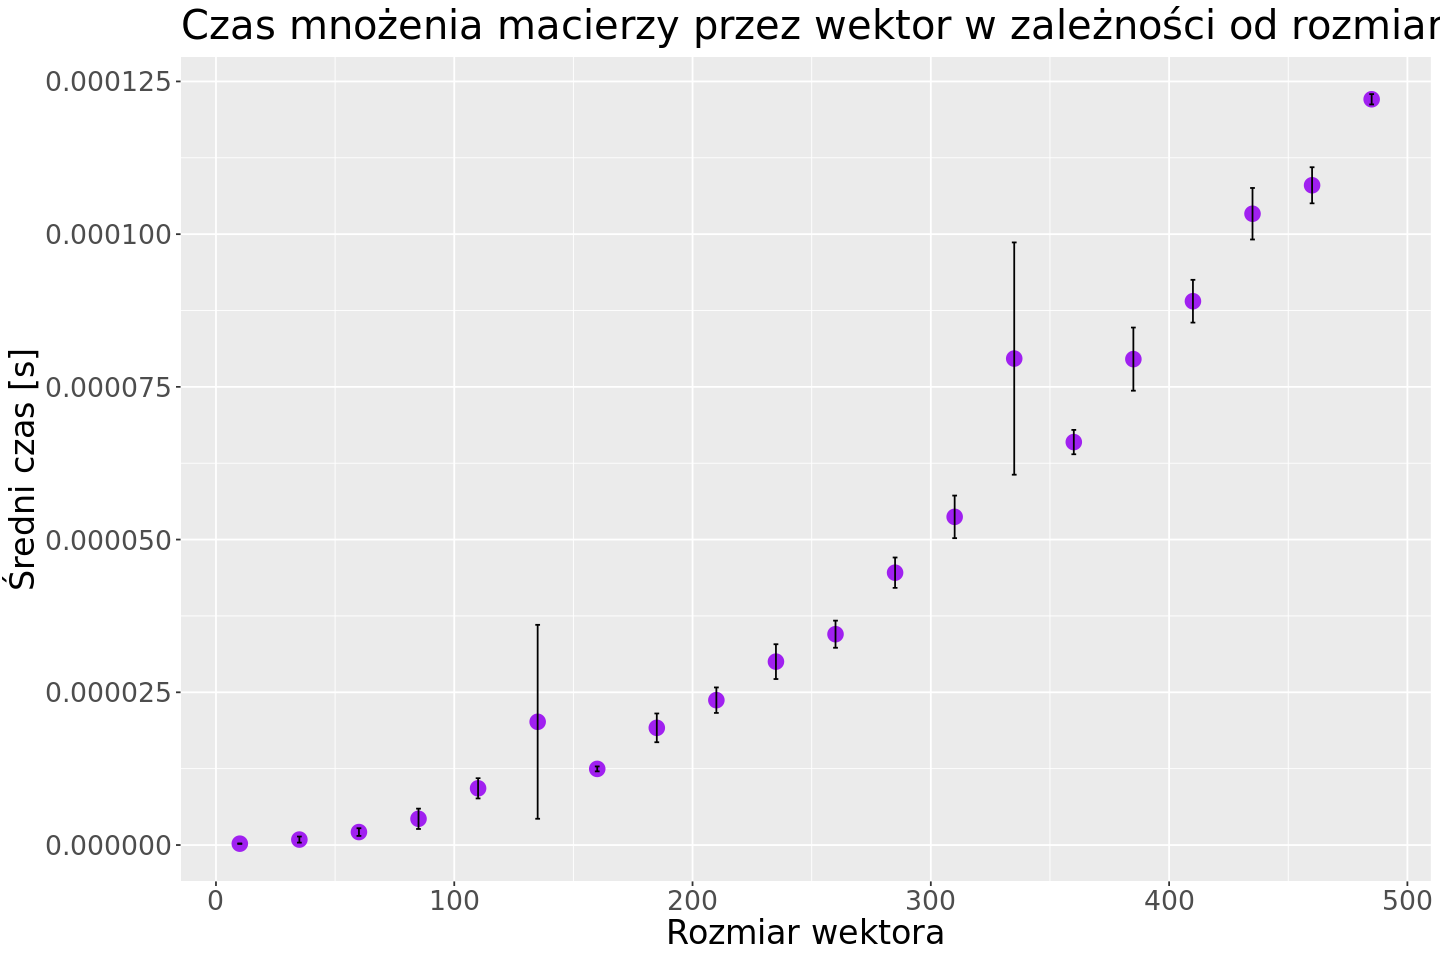

In [7]:
wyk4 <- ggplot(results, aes(x = Length)) + 
geom_point(aes(y = Matrix_mean), size = 4, color="purple") + 
geom_errorbar(aes(ymin = Matrix_mean - Matrix_sd, ymax = Matrix_mean + Matrix_sd, width=2)) +
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy przez wektor w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk4

## Wersja druga

## Zadanie 1

In [8]:
data2 <- read.csv("timetests2.csv")
print(data2)

       Alg Length      Time
1   Scalar     10 0.0000001
2   Scalar     10 0.0000001
3   Scalar     10 0.0000001
4   Scalar     10 0.0000001
5   Scalar     10 0.0000000
6   Scalar     10 0.0000001
7   Scalar     10 0.0000001
8   Scalar     10 0.0000001
9   Scalar     10 0.0000001
10  Scalar     10 0.0000001
11  Scalar     35 0.0000001
12  Scalar     35 0.0000001
13  Scalar     35 0.0000001
14  Scalar     35 0.0000002
15  Scalar     35 0.0000001
16  Scalar     35 0.0000001
17  Scalar     35 0.0000001
18  Scalar     35 0.0000001
19  Scalar     35 0.0000001
20  Scalar     35 0.0000002
21  Scalar     60 0.0000002
22  Scalar     60 0.0000001
23  Scalar     60 0.0000001
24  Scalar     60 0.0000001
25  Scalar     60 0.0000001
26  Scalar     60 0.0000001
27  Scalar     60 0.0000001
28  Scalar     60 0.0000001
29  Scalar     60 0.0000001
30  Scalar     60 0.0000001
31  Scalar     85 0.0000001
32  Scalar     85 0.0000001
33  Scalar     85 0.0000001
34  Scalar     85 0.0000001
35  Scalar     85 0.

In [9]:
results2 <- aggregate(Time ~ Length:Alg, data=data2, FUN=mean)
results2$Sd <- aggregate(Time ~ Length:Alg, data=data2, FUN=sd)$Time
colnames(results2) <- c('Length', 'Alg', 'Mean', 'Sd')
print(results2)

   Length    Alg       Mean           Sd
1      10 Matrix 0.00000028 2.299758e-07
2      35 Matrix 0.00000078 4.216370e-08
3      60 Matrix 0.00000203 8.232726e-08
4      85 Matrix 0.00000413 5.677441e-07
5     110 Matrix 0.00000648 2.699794e-07
6     135 Matrix 0.00001155 3.435194e-06
7     160 Matrix 0.00001348 1.721627e-06
8     185 Matrix 0.00001843 5.696978e-07
9     210 Matrix 0.00003025 7.617268e-06
10    235 Matrix 0.00003843 6.661840e-06
11    260 Matrix 0.00004061 5.920107e-06
12    285 Matrix 0.00005489 7.101244e-06
13    310 Matrix 0.00006604 1.174499e-05
14    335 Matrix 0.00006194 5.339829e-06
15    360 Matrix 0.00007342 1.241780e-05
16    385 Matrix 0.00010891 5.242502e-05
17    410 Matrix 0.00011162 6.640401e-05
18    435 Matrix 0.00010303 7.696471e-06
19    460 Matrix 0.00014947 4.220508e-05
20    485 Matrix 0.00013637 1.285302e-05
21     10 Scalar 0.00000009 3.162278e-08
22     35 Scalar 0.00000012 4.216370e-08
23     60 Scalar 0.00000011 3.162278e-08
24     85 Scalar

## Zadanie 2

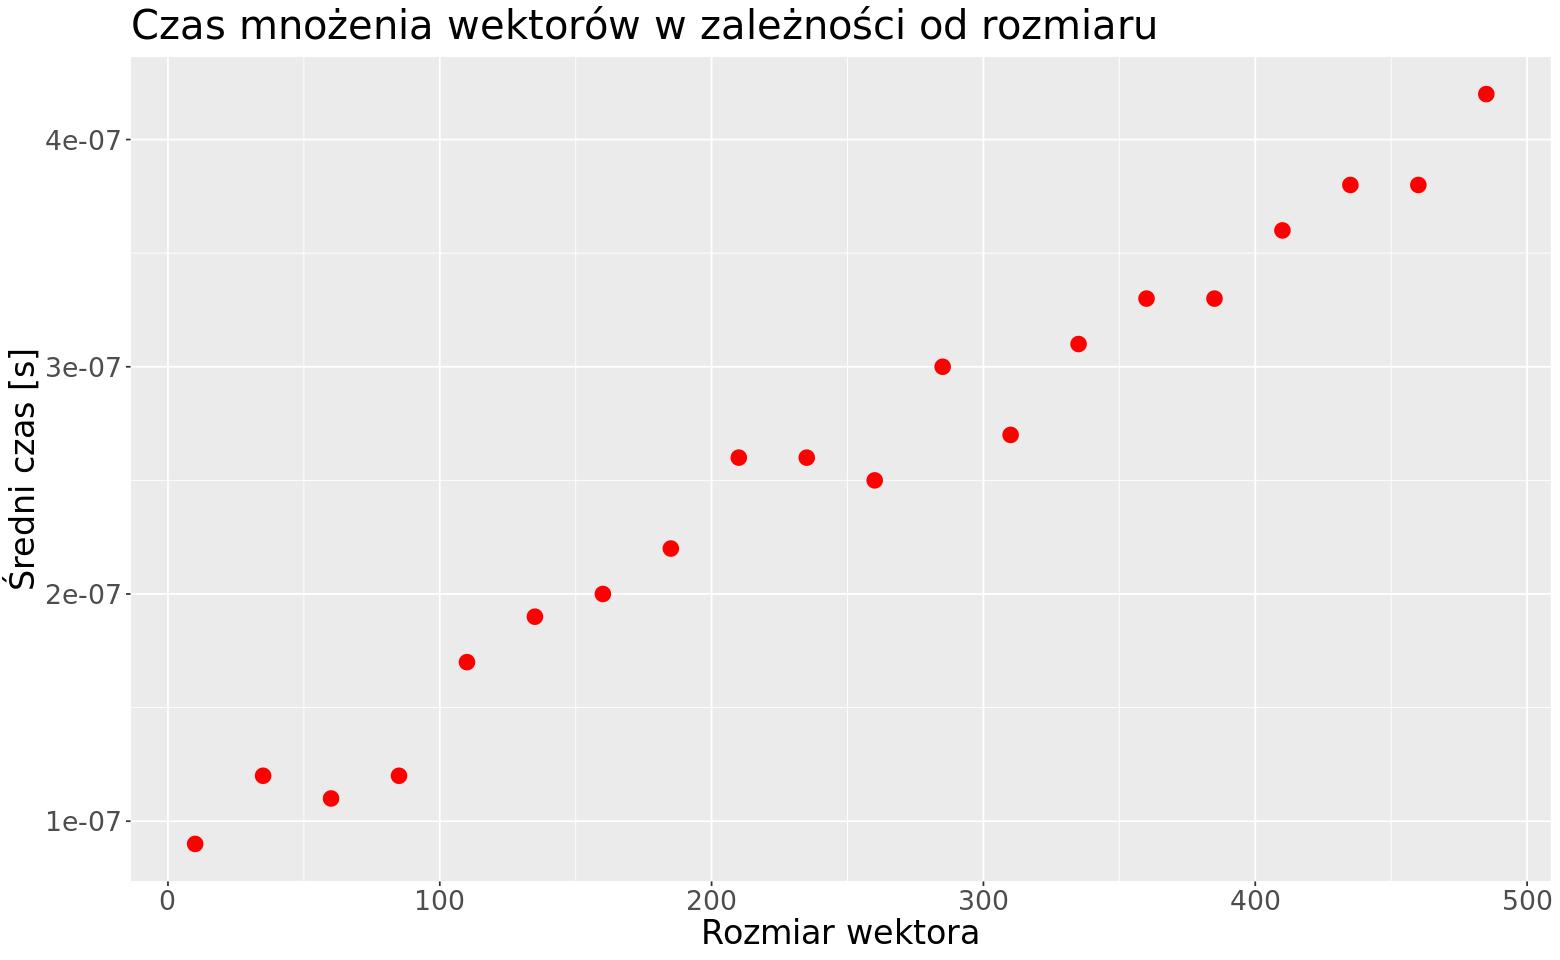

In [10]:
options(repr.plot.width=13, repr.plot.height=8)
wyk5 <- ggplot(results2[results2$Alg=="Scalar",], aes(x = Length)) + 
geom_point(aes(y = Mean), size = 4, color="red") +
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk5

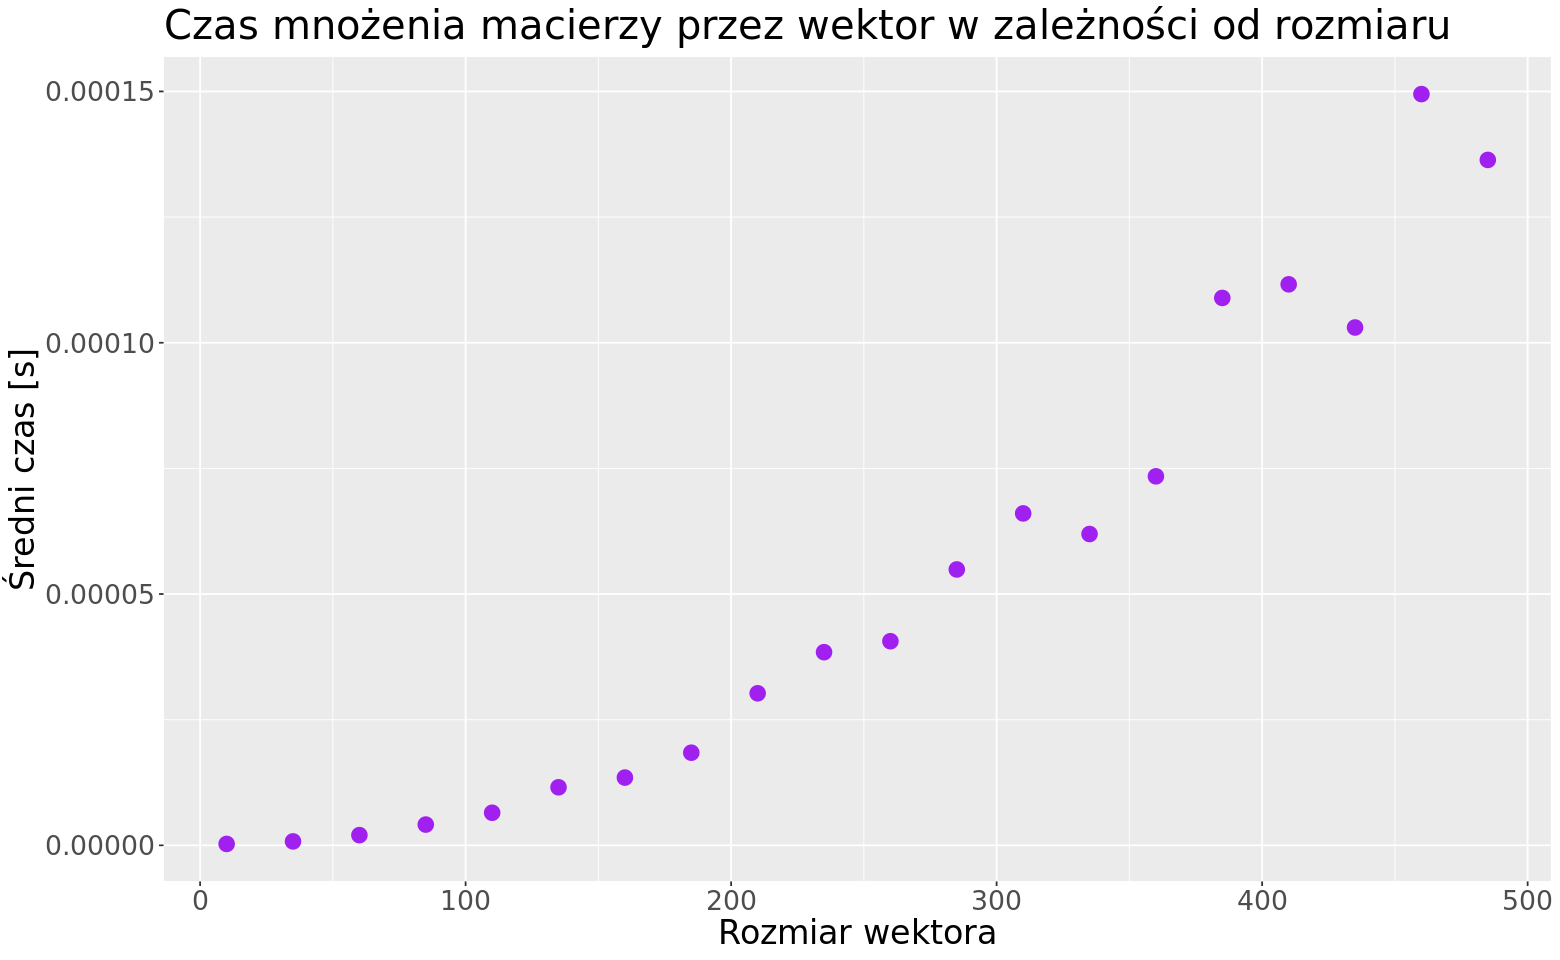

In [11]:
wyk6 <- ggplot(results2[results2$Alg=="Matrix",], aes(x = Length)) + 
geom_point(aes(y = Mean), size = 4, color="purple") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy przez wektor w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk6

## Zadanie 3

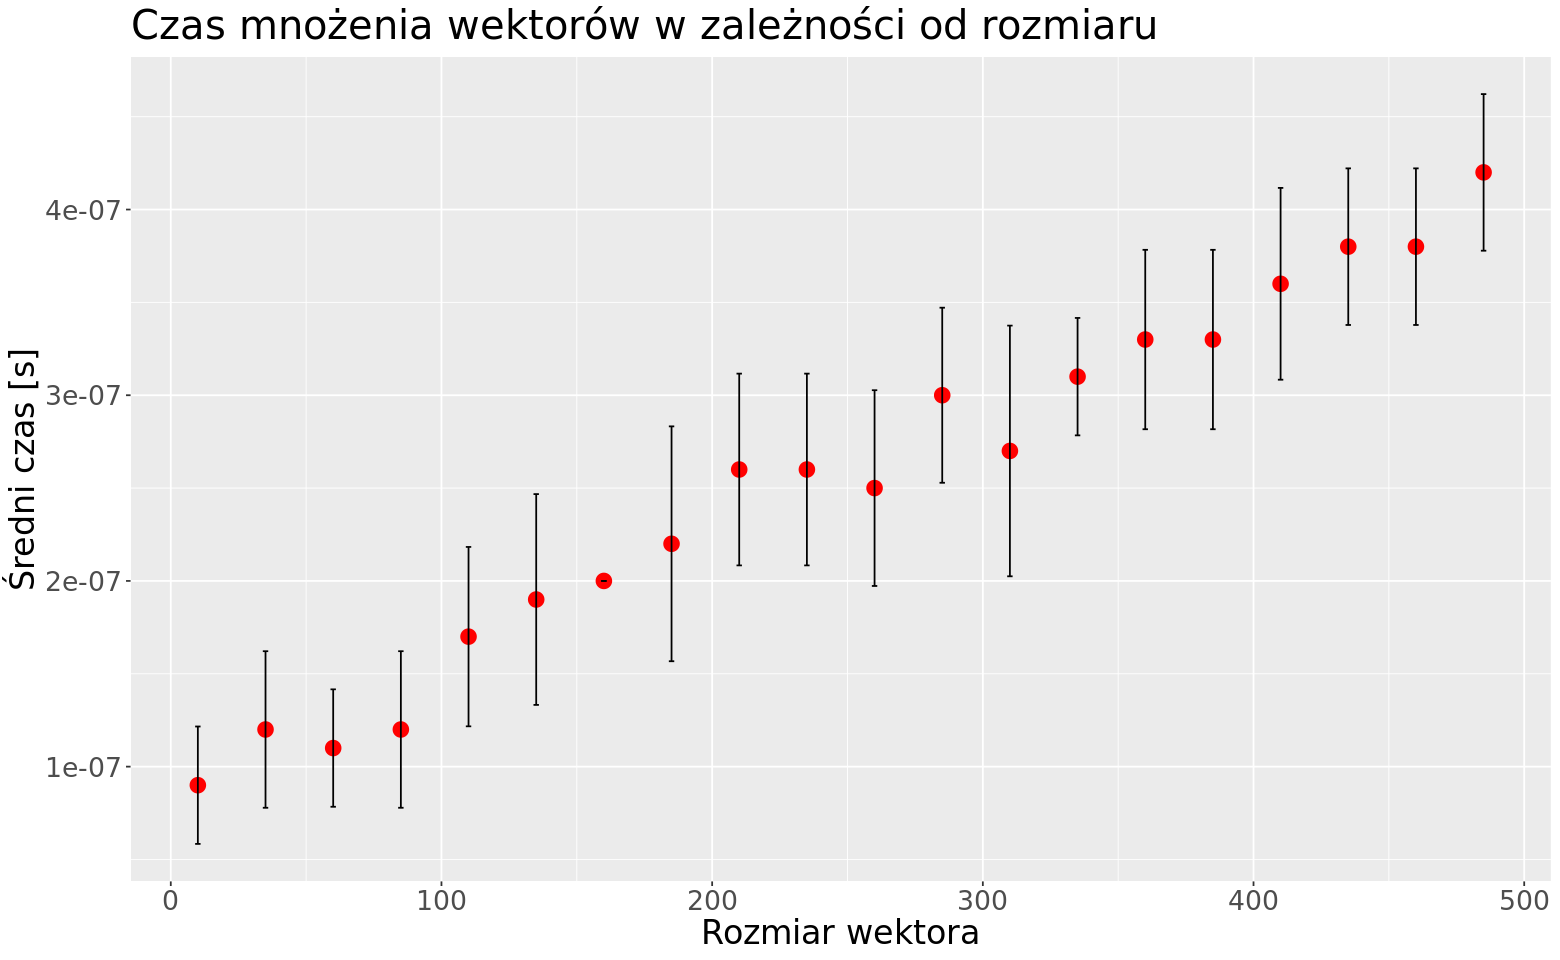

In [12]:
wyk7 <- ggplot(results2[results2$Alg=="Scalar",], aes(x = Length)) + 
geom_point(aes(y = Mean), size = 4, color="red") +
geom_errorbar(aes(ymin = Mean - Sd, ymax = Mean + Sd, width=2)) +
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk7

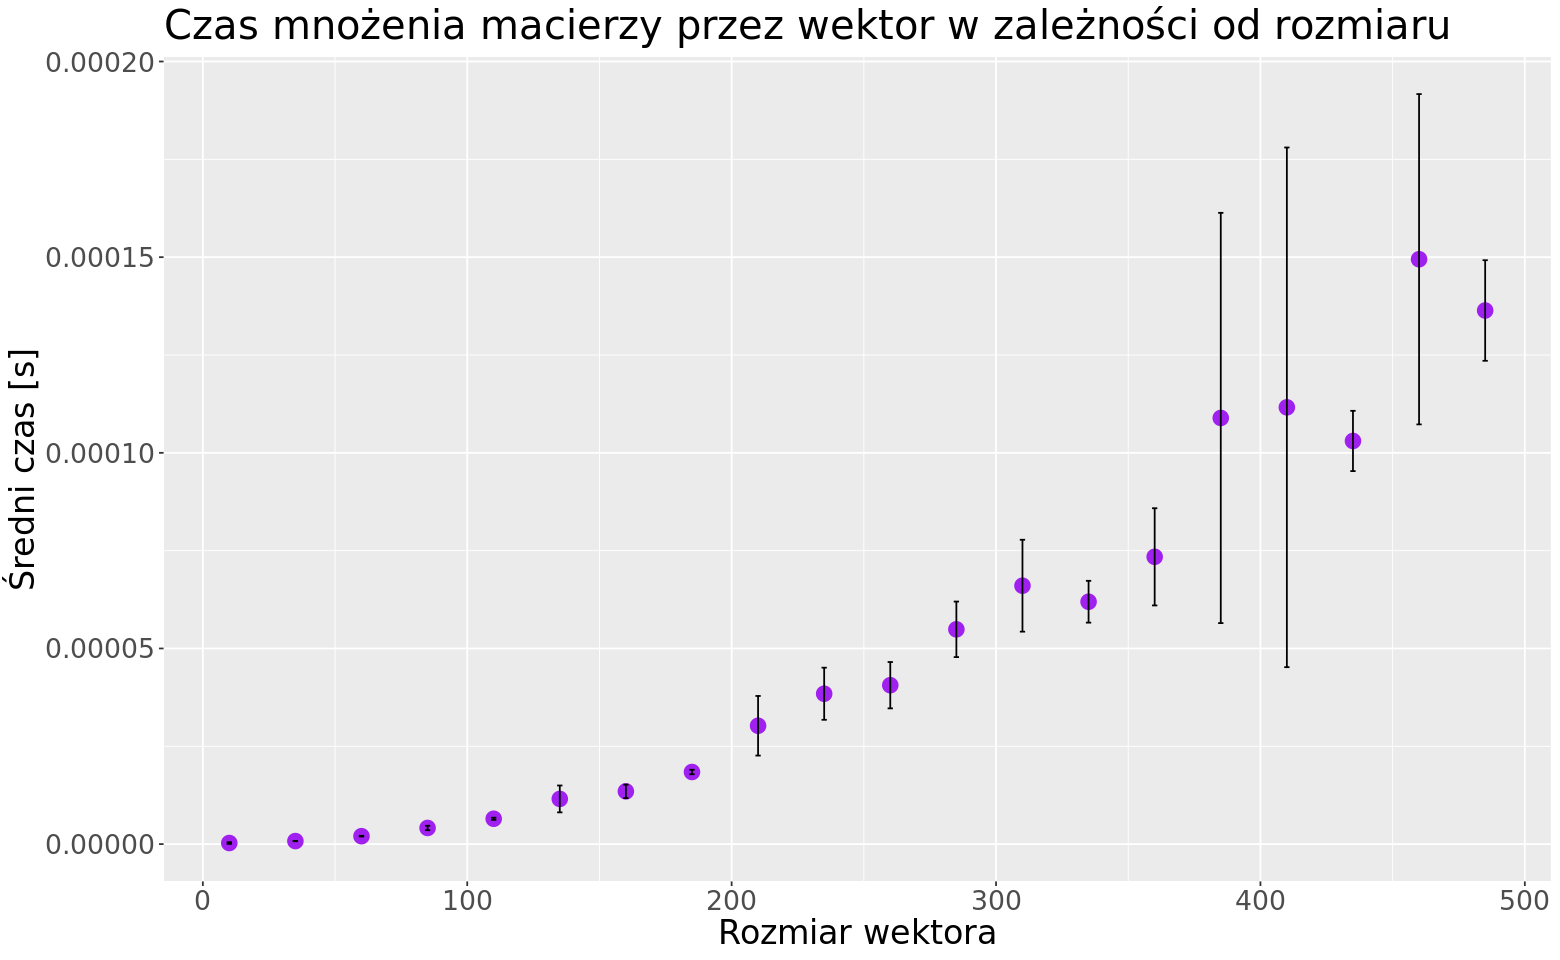

In [13]:
wyk8 <- ggplot(results2[results2$Alg=="Matrix",], aes(x = Length)) + 
geom_point(aes(y = Mean), size = 4, color="purple") + 
geom_errorbar(aes(ymin = Mean - Sd, ymax = Mean + Sd, width=2)) +
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy przez wektor w zależności od rozmiaru") +
xlab("Rozmiar wektora") +
ylab("Średni czas [s]") 
wyk8